In [1]:
import pandas as pd

df = pd.read_csv('data.csv') # csv 데이터 불러옴
data_size = 12000 # data 사이즈 설정

In [2]:
df.head()

,row_num,_id,db_id,rcrd_id,signal
0,0,602b94114b50caecb7a3e315,bpssrat,ssbn13hs01,138.01
1,1,602b94114b50caecb7a3e316,bpssrat,ssbn13hs01,137.23
2,2,602b94214b50caecb7a3e317,bpssrat,ssbn13hs01,136.18
3,3,602b94214b50caecb7a3e318,bpssrat,ssbn13hs01,134.74
4,4,602b94214b50caecb7a3e319,bpssrat,ssbn13hs01,132.21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   row_num  12000 non-null  int64  
 1   _id      12000 non-null  object 
 2   db_id    12000 non-null  object 
 3   rcrd_id  12000 non-null  object 
 4   signal   12000 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 468.9+ KB


In [4]:
df.describe()

,row_num,signal
count,12000.00000,12000.000000
mean,5999.50000,143.024922
std,3464.24595,9.055939
min,0.00000,123.590000
25%,2999.75000,135.580000
50%,5999.50000,141.170000
75%,8999.25000,150.310000
max,11999.00000,168.670000


In [5]:
series = df['signal'].values

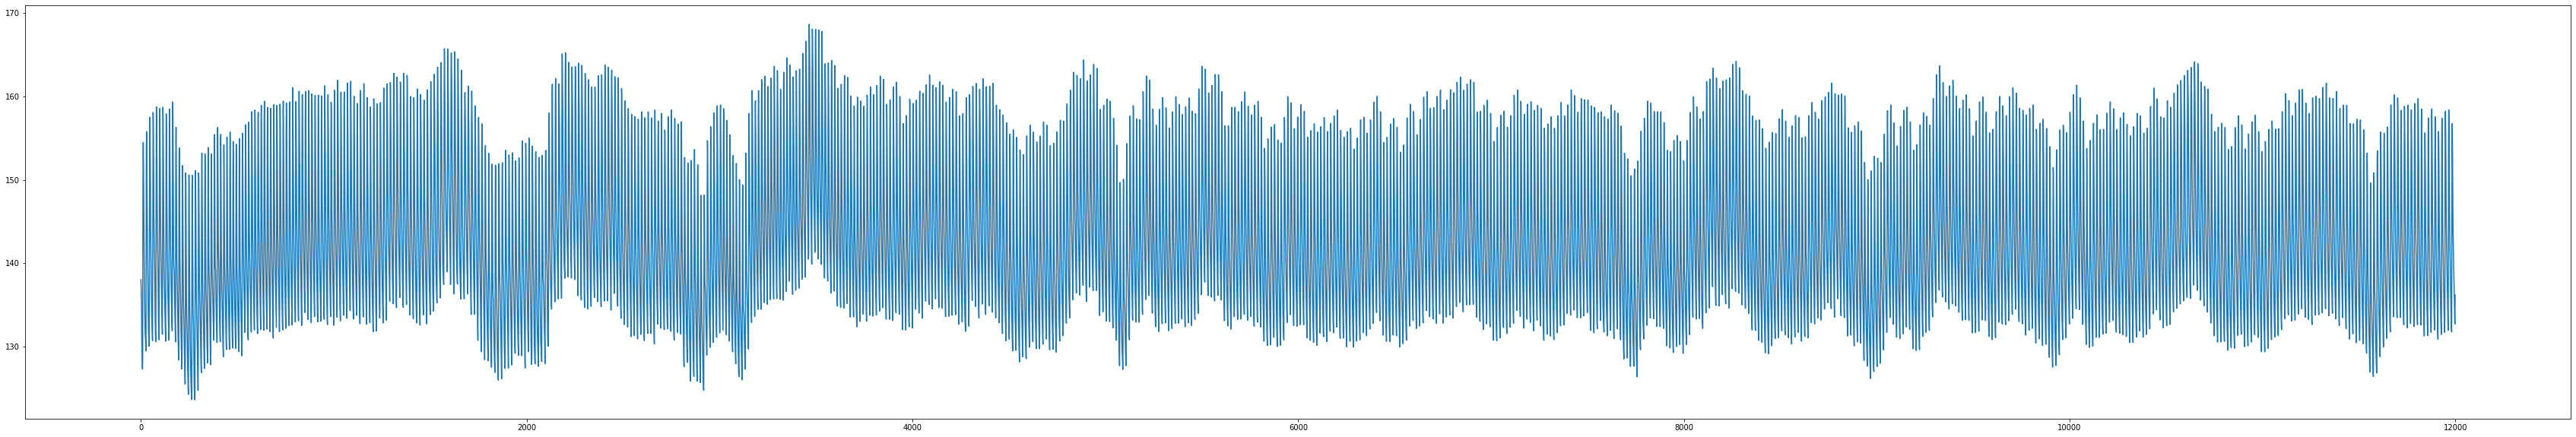

In [6]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (60,10)
plt.plot(series)
plt.show()

In [7]:
# 전체 데이터셋에서 훈련 데이터셋은 75%, 테스트 데이터셋는 25%로 나눌 것
# 또한 훈련 데이터셋을 다시 훈련 데이터셋 75%, 검증 데이터셋 25%로 나눌 것

train_end_index = int(data_size*0.75*0.75) 
# 훈련 데이터 75%의 75% 인덱스 설정
val_end_index = int(data_size*0.75) # 검증 데이터 75%의 인덱스 설정
train = series[:train_end_index] # 훈련 데이터 나누기
val = series[train_end_index:val_end_index] # 검증 데이터 나누기
test = series[val_end_index:] # 테스트 데이터 나누기

In [8]:
print(train.shape) # 훈련 데이터
print(val.shape) # 검증 데이터
print(test.shape) # 테스트 데이터

(6750,)
(2250,)
(3000,)


In [9]:
lookback = 50 # 과거의 데이터 고려 정도
forward = 1 # 어느 데이터를 예측할것인지